<a href="https://colab.research.google.com/github/sidwekhande/sandbox/blob/master/Seaborn%20Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install seaborn --upgrade


    100% |████████████████████████████████| 215kB 23.4MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
import seaborn as sns
sns.set(style="ticks")

import pandas as pd
import matplotlib.pyplot as plt


In [4]:
%%bash
wget https://nekrut.github.io/BMMB554/tnseq_untreated.txt.gz
wget https://nekrut.github.io/BMMB554/ta_gc.txt

--2019-02-04 19:43:23--  https://nekrut.github.io/BMMB554/tnseq_untreated.txt.gz
Resolving nekrut.github.io (nekrut.github.io)... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
Connecting to nekrut.github.io (nekrut.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2012967 (1.9M) [application/gzip]
Saving to: ‘tnseq_untreated.txt.gz’

     0K .......... .......... .......... .......... ..........  2% 3.44M 1s
    50K .......... .......... .......... .......... ..........  5% 6.79M 0s
   100K .......... .......... .......... .......... ..........  7%  168M 0s
   150K .......... .......... .......... .......... .......... 10%  227M 0s
   200K .......... .......... .......... .......... .......... 12% 6.93M 0s
   250K .......... .......... .......... .......... .......... 15%  184M 0s
   300K .......... .......... .......... .......... .......... 17%  125M 0s
   350K .......... .......... .......... .......... .......... 20% 7.45M

In [0]:
data_file = 'tnseq_untreated.txt.gz'

In [0]:
import os
f = open('data.txt','w')

with os.popen('gunzip -c {}'.format(data_file)) as stream:
  for line in stream:
    if line.split( '\t' )[7].startswith( '.' ):
      f.write( '{}\t{}\n'.format( '\t'.join( line.split( '\t' )[:7] ) , 'intergenic'  ) )
    elif line.split( '\t' )[7].startswith( 'ID' ):
      f.write( '{}\t{}\n'.format( '\t'.join( line.split( '\t' )[:7] ) , line.split( '\t' )[7].split(';')[0][3:] ) )
f.close()

In [0]:
tnseq = pd.read_table('data.txt', header=None, names=['pos','blunt','cap','dual','erm','pen','tuf','gene'])

gc = pd.read_table('ta_gc.txt', header=None, names=['pos','gc'])

In [0]:
df = sns.load_dataset('anscombe')


In [9]:
df.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

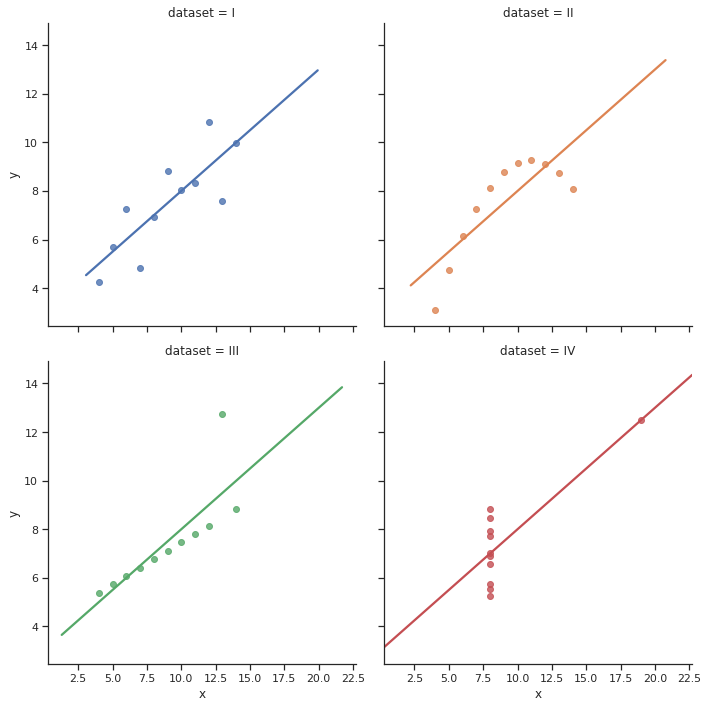

In [11]:
sns.lmplot(x='x',y='y',col = 'dataset', hue = 'dataset', data=df, col_wrap=2, ci =None)

Back to tnseq data

In [0]:
tn_gc = tnseq.merge(gc,left_on='pos',right_on='pos',how='left')

In [14]:
tn_gc.head()


,pos,blunt,cap,dual,erm,pen,tuf,gene,gc
0,2400002,0.0,0.0,1.0,0.0,0.0,1.0,intergenic,0.225490
1,2400004,1.0,0.0,5.0,0.0,0.0,1.0,intergenic,0.225490
2,2400006,1.0,0.0,5.0,1.0,0.0,1.0,intergenic,0.215686
3,2400009,2.0,2.0,8.0,1.0,0.0,0.0,intergenic,0.225490
4,2400029,6.0,1.0,0.0,1.0,0.0,1.0,intergenic,0.215686


In [0]:
tdf = pd.melt(tn_gc,id_vars = ['pos','gc','gene'],value_vars=['blunt','cap','dual','erm','pen','tuf'],var_name='construct',value_name='count')

In [19]:
tdf.head()

,pos,gc,gene,construct,count
0,2400002,0.225490,intergenic,blunt,0.0
1,2400004,0.225490,intergenic,blunt,1.0
2,2400006,0.215686,intergenic,blunt,1.0
3,2400009,0.225490,intergenic,blunt,2.0
4,2400029,0.215686,intergenic,blunt,6.0


In [0]:
tdf.loc[tdf['gene'] == 'intergenic','genic'] = 'no'

In [0]:
tdf.loc[tdf['gene'] != 'intergenic','genic'] = 'yes'

In [41]:
tdf.head()

,pos,gc,gene,construct,count,genic
0,2400002,0.225490,intergenic,blunt,0.0,no
1,2400004,0.225490,intergenic,blunt,1.0,no
2,2400006,0.215686,intergenic,blunt,1.0,no
3,2400009,0.225490,intergenic,blunt,2.0,no
4,2400029,0.215686,intergenic,blunt,6.0,no


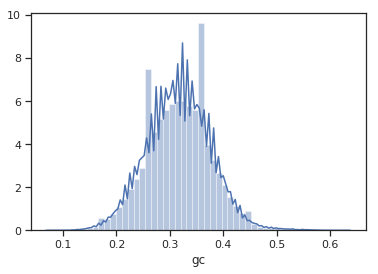

In [23]:
sns.distplot(tdf['gc'])

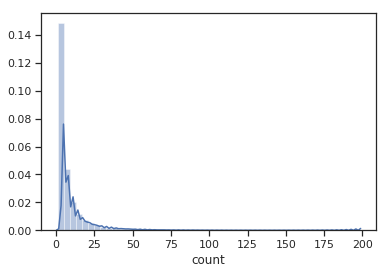

In [25]:
sns.distplot(tdf['count'][(tdf['count']>0) & (tdf['count'] <200)])

[None]

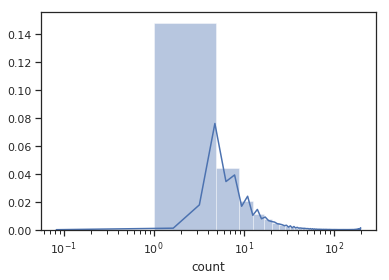

In [27]:
g = sns.distplot(tdf['count'][(tdf['count']>0) & (tdf['count'] <200)])
g.set(xscale='log')

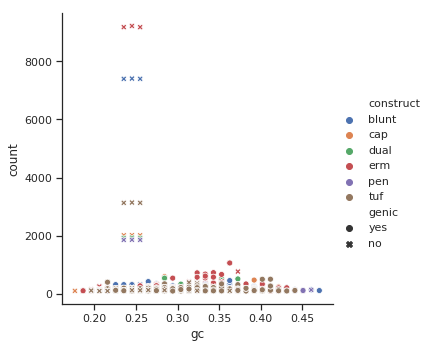

In [42]:
sns.relplot(x='gc',y='count',data=tdf[tdf['count']>100], hue='construct',style='genic')

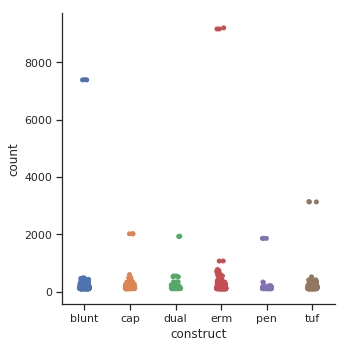

In [43]:
sns.catplot(x='construct',y='count',data=tdf[tdf['count']>100])

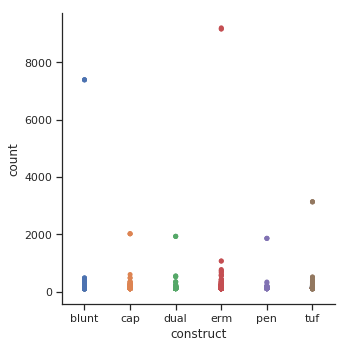

In [44]:
sns.catplot(x='construct',y='count',data=tdf[tdf['count']>100],jitter=False)

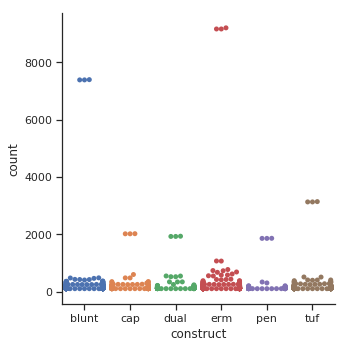

In [45]:
sns.catplot(x='construct',y='count',data=tdf[tdf['count']>100],kind='swarm')

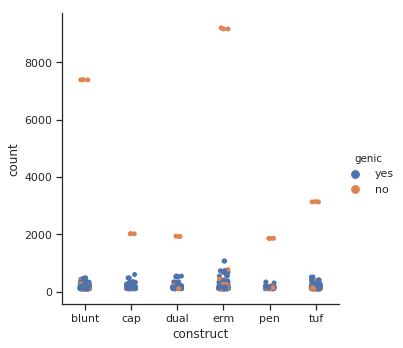

In [46]:
sns.catplot(x='construct',y='count',data=tdf[tdf['count']>100],hue='genic')

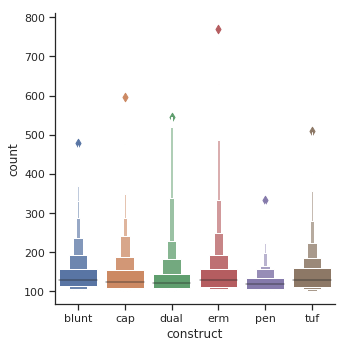

In [49]:
sns.catplot(x='construct',y='count',data=tdf[(tdf['count']>100) & (tdf['count']<1000)],kind='boxen')

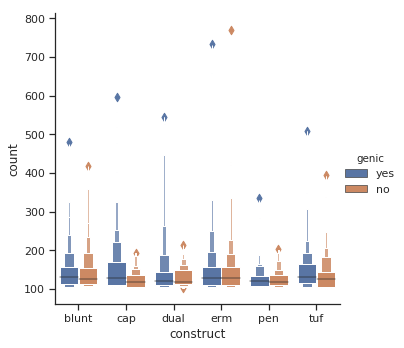

In [53]:
sns.catplot(x='construct',y='count',data=tdf[(tdf['count']>100) & (tdf['count']<1000)],kind='boxen',hue='genic')

In [0]:
small_df = tdf[(tdf['count']>100) & (tdf['count']<1000)]

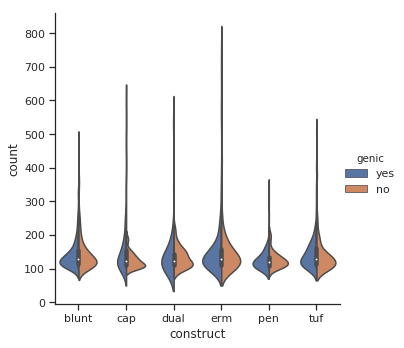

In [54]:
sns.catplot(x="construct",y="count",data=small_df,kind = "violin",hue="genic",split=True)

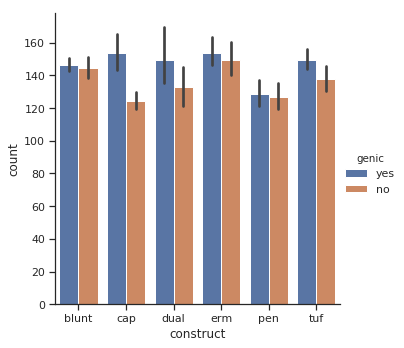

In [55]:
sns.catplot(x="construct",y="count",hue="genic",kind="bar",data=small_df)